In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings as wrn
from utils.helper import *
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)
%matplotlib inline

In [72]:
DATA_PATH = "data/"
USERNAME = "Dina Mostarterra"

In [73]:
data = pd.read_csv(DATA_PATH + "Database Dina Mostarterra Content List - db.csv")
data.tail()

,id,title,views,date,url,game_name,content_name,topic,duration,start_stream,end_stream,note,Last Update
31,32,Ujian Sim A di Livium Universe,701,22-December-2022,https://www.youtube.com/watch?v=dyzvyIoI1ac,NFS Heat,NaN,Game,02:58:46,21:00,23:58,NaN,NaN
32,33,No Jumpscare Intended Here I Swear,510,25-December-2022,https://www.youtube.com/watch?v=AuHdSkX6ZX0,The Closing Shift,NaN,Game,02:54:04,19:30,22:24,NaN,NaN
33,34,"Livium Chapter:01 Alter, Finally!?",482,26-December-2022,https://www.youtube.com/watch?v=wa0UV2y7pLA,The Sims 4,NaN,Game,02:45:21,19:30,22:15,NaN,NaN
34,35,"Good Morning, What kind of breakfast do I need?",583,29-December-2022,https://www.youtube.com/watch?v=7F8dCfct5kc,NaN,NaN,Free Talk,02:53:56,10:00,12:53,NaN,NaN
35,36,All SSS Rank No Cap FR FR,552,30-December-2022,https://www.youtube.com/watch?v=VtOx1oOYrtc,Devil My Cry 5,NaN,Game,02:54:22,20:30,23:24,NaN,NaN


In [74]:
data.shape

(36, 13)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            36 non-null     int64  
 1   title         36 non-null     object 
 2   views         36 non-null     int64  
 3   date          36 non-null     object 
 4   url           36 non-null     object 
 5   game_name     23 non-null     object 
 6   content_name  8 non-null      object 
 7   topic         36 non-null     object 
 8   duration      36 non-null     object 
 9   start_stream  36 non-null     object 
 10  end_stream    36 non-null     object 
 11  note          0 non-null      float64
 12  Last Update   2 non-null      object 
dtypes: float64(1), int64(2), object(10)
memory usage: 3.8+ KB


In [76]:
COLS = ['url', 'note', "Last Update"]

In [77]:
data.drop(COLS, axis=1, inplace=True)

### Impute missing values with `UNKNOWN` value

In [78]:
impute_missing_values(data=data, columns = ["game_name", "content_name"])

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream
0,1,Get to know me better?,502,29-September-2022,UNKNOWN,Dono Reading,Free Talk,01:54:40,19:00,20:54
1,2,WAJIB PAKE NASII!!!,488,30-September-2022,Cooking Simulator,UNKNOWN,Game,02:00:12,19:00,21:00
2,3,Game ini ramah sekali bintang 5,418,2-October-2022,Getting Over It,UNKNOWN,Game,01:52:50,19:45,21:37
3,4,I will put you into turu,318,4-October-2022,UNKNOWN,UNKNOWN,Free Talk,01:58:53,22:00,23:58
4,5,Please spare me...,267,06-October-2022,Outlast,UNKNOWN,Game,01:40:02,22:00,23:40
5,6,Akhirnya Ketemu Om Dante!!,300,07-October-2022,Devil My Cry 5,UNKNOWN,Game,01:50:54,19:30,21:20
6,7,I am bad at Teaching but... here we are,342,16-October-2022,UNKNOWN,UNKNOWN,Free Talk,01:59:10,13:00,14:59
7,8,Melanjutkan Petualangan Abang Reporter...,460,17-October-2022,Outlast,UNKNOWN,Game,02:34:20,20:00,22:34
8,9,"P palo, please bear with my aim",474,18-October-2022,Valorant,UNKNOWN,Game,02:57:34,19:30,22:27
9,10,Memecahkan misteri dunia bersama Pergil,305,20-October-2022,Devil My Cry 5,UNKNOWN,Game,02:10:24,19:30,21:40


In [79]:
data[data["content_name"] == "NoNgDin"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream
20,21,NoNgDin - Nongkrong Bareng Dina,479,24-November-2022,UNKNOWN,NoNgDin,Free Talk,02:24:57,14:00,16:24
23,24,Berita apakah yang kita bahas hari ini?,550,4-December-2022,UNKNOWN,NoNgDin,Free Talk,01:56:58,15:00,16:56
25,26,"Kopi, Kopi apa yang bikin kangen?",433,7-December-2022,UNKNOWN,NoNgDin,Free Talk,01:54:49,15:00,16:54


In [80]:
data.isna().sum()

id              0
title           0
views           0
date            0
game_name       0
content_name    0
topic           0
duration        0
start_stream    0
end_stream      0
dtype: int64

### Exclude announcement stream 

In [81]:
data[data["topic"] == "Guerilla"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream
13,14,An announcement for you all...,509,8-November-2022,UNKNOWN,UNKNOWN,Guerilla,00:35:04,19:00,19:35


In [83]:
data.drop(data.index[13], inplace=True)

### Convert Data into datetime

#### Get Days

In [84]:
convert_date_to_days(data=data)

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days
0,1,Get to know me better?,502,2022-09-29,UNKNOWN,Dono Reading,Free Talk,01:54:40,19:00,20:54,Kamis
1,2,WAJIB PAKE NASII!!!,488,2022-09-30,Cooking Simulator,UNKNOWN,Game,02:00:12,19:00,21:00,Jum'at
2,3,Game ini ramah sekali bintang 5,418,2022-10-02,Getting Over It,UNKNOWN,Game,01:52:50,19:45,21:37,Minggu
3,4,I will put you into turu,318,2022-10-04,UNKNOWN,UNKNOWN,Free Talk,01:58:53,22:00,23:58,Selasa
4,5,Please spare me...,267,2022-10-06,Outlast,UNKNOWN,Game,01:40:02,22:00,23:40,Kamis
5,6,Akhirnya Ketemu Om Dante!!,300,2022-10-07,Devil My Cry 5,UNKNOWN,Game,01:50:54,19:30,21:20,Jum'at
6,7,I am bad at Teaching but... here we are,342,2022-10-16,UNKNOWN,UNKNOWN,Free Talk,01:59:10,13:00,14:59,Minggu
7,8,Melanjutkan Petualangan Abang Reporter...,460,2022-10-17,Outlast,UNKNOWN,Game,02:34:20,20:00,22:34,Senin
8,9,"P palo, please bear with my aim",474,2022-10-18,Valorant,UNKNOWN,Game,02:57:34,19:30,22:27,Selasa
9,10,Memecahkan misteri dunia bersama Pergil,305,2022-10-20,Devil My Cry 5,UNKNOWN,Game,02:10:24,19:30,21:40,Kamis


#### Get Hours

In [85]:
get_hours(data=data)

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
0,1,Get to know me better?,502,2022-09-29,UNKNOWN,Dono Reading,Free Talk,01:54:40,19:00:00,20:54,Kamis,19
1,2,WAJIB PAKE NASII!!!,488,2022-09-30,Cooking Simulator,UNKNOWN,Game,02:00:12,19:00:00,21:00,Jum'at,19
2,3,Game ini ramah sekali bintang 5,418,2022-10-02,Getting Over It,UNKNOWN,Game,01:52:50,19:45:00,21:37,Minggu,19
3,4,I will put you into turu,318,2022-10-04,UNKNOWN,UNKNOWN,Free Talk,01:58:53,22:00:00,23:58,Selasa,22
4,5,Please spare me...,267,2022-10-06,Outlast,UNKNOWN,Game,01:40:02,22:00:00,23:40,Kamis,22
5,6,Akhirnya Ketemu Om Dante!!,300,2022-10-07,Devil My Cry 5,UNKNOWN,Game,01:50:54,19:30:00,21:20,Jum'at,19
6,7,I am bad at Teaching but... here we are,342,2022-10-16,UNKNOWN,UNKNOWN,Free Talk,01:59:10,13:00:00,14:59,Minggu,13
7,8,Melanjutkan Petualangan Abang Reporter...,460,2022-10-17,Outlast,UNKNOWN,Game,02:34:20,20:00:00,22:34,Senin,20
8,9,"P palo, please bear with my aim",474,2022-10-18,Valorant,UNKNOWN,Game,02:57:34,19:30:00,22:27,Selasa,19
9,10,Memecahkan misteri dunia bersama Pergil,305,2022-10-20,Devil My Cry 5,UNKNOWN,Game,02:10:24,19:30:00,21:40,Kamis,19


### Get count days for Livestream 

In [86]:
data["days"].value_counts()

Kamis     9
Minggu    6
Senin     6
Rabu      5
Jum'at    4
Sabtu     3
Selasa    2
Name: days, dtype: int64

In [87]:
print(f"Selama 3 bulan ini, Dina sudah melakukan stream sebanyak {len(data.index)} kali")

Selama 3 bulan ini, Dina sudah melakukan stream sebanyak 35 kali


### Plot Livestream Days in 3 months 

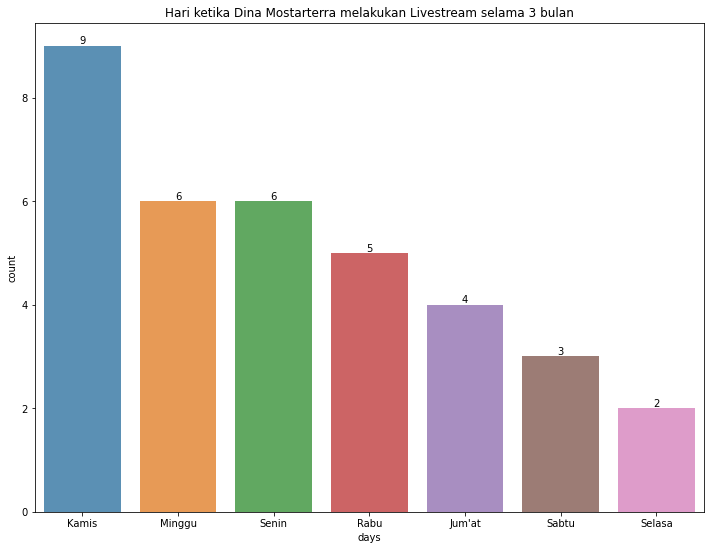

In [88]:
plot_count_days(data=data, username=USERNAME)

### Get Average Views based on Days

In [89]:
get_avg_days = round(data.groupby(["days"])['views'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]), 2)

In [90]:
get_avg_days

days
Senin     469.33
Selasa    396.00
Rabu      460.80
Kamis     455.78
Jum'at    413.25
Sabtu     426.67
Minggu    400.83
Name: views, dtype: float64

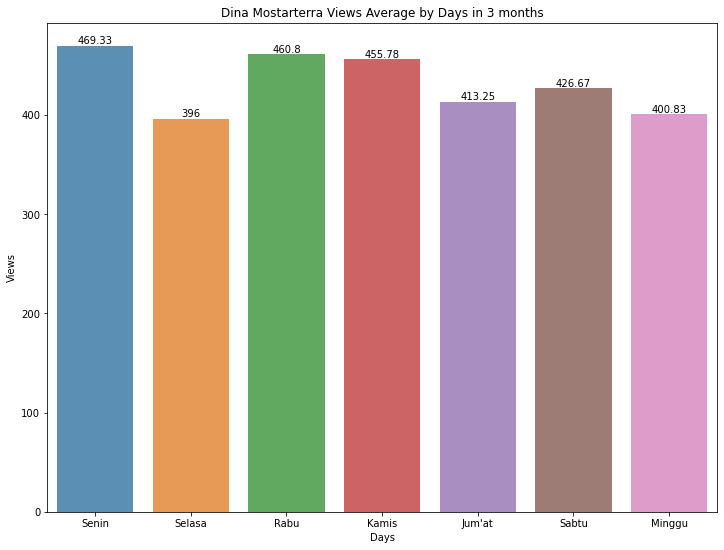

In [91]:
plot_avg_days_views(data=data,
                    var_name=get_avg_days,
                    username=USERNAME)

### Get count hours livestream 

In [92]:
data["hours"].value_counts()

19    15
20    10
22     3
14     2
15     2
13     1
21     1
10     1
Name: hours, dtype: int64

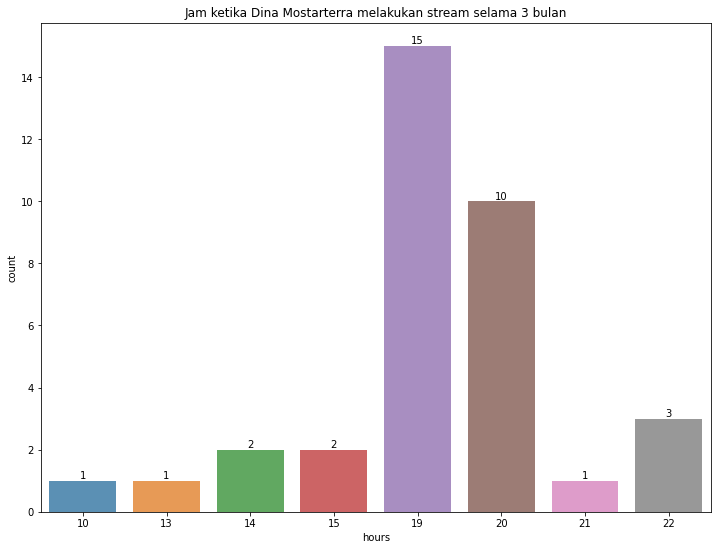

In [93]:
plot_count_hours(data=data, username=USERNAME)

### Trend Views in 3 months 

In [94]:
min(data["date"]), max(data["date"])

(Timestamp('2022-09-29 00:00:00'), Timestamp('2022-12-30 00:00:00'))

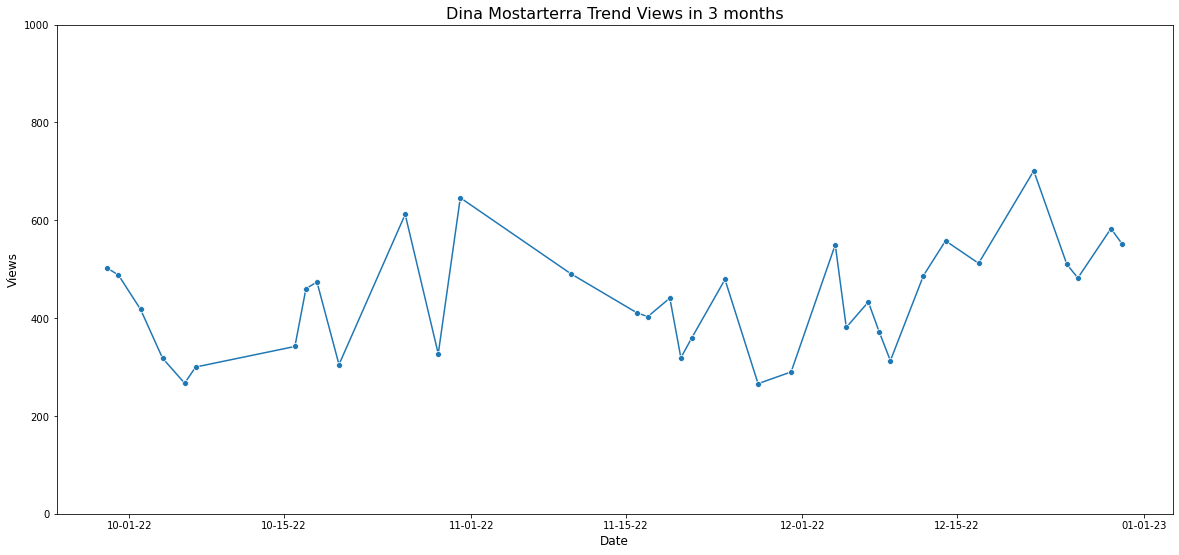

In [95]:
plot_trend_views(data=data, username=USERNAME, max_limit=1000)

In [96]:
min_views = min(data["views"])
min_views

266

In [97]:
data[data["views"] == min_views]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
21,22,OMW Jadi Babu si Oyen!,266,2022-11-27,Stray,UNKNOWN,Game,02:04:36,19:30:00,21:34,Minggu,19


In [98]:
max_views = max(data["views"])
max_views

701

In [99]:
data[data["views"] == max_views]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
31,32,Ujian Sim A di Livium Universe,701,2022-12-22,NFS Heat,UNKNOWN,Game,02:58:46,21:00:00,23:58,Kamis,21


### Views distribution 

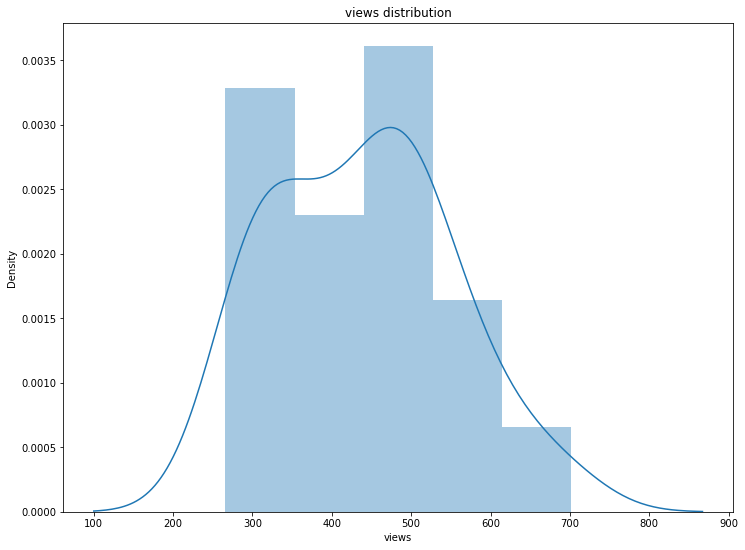

In [100]:
plot_distribution(data=data, col="views")

### Get average views 

In [101]:
mean = np.average(data['views'])
mean

438.62857142857143

### Get median views 

In [102]:
median = np.median(data['views'])
median

441.0

### Get average views in each hours

In [103]:
data.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours
0,1,Get to know me better?,502,2022-09-29,UNKNOWN,Dono Reading,Free Talk,01:54:40,19:00:00,20:54,Kamis,19
1,2,WAJIB PAKE NASII!!!,488,2022-09-30,Cooking Simulator,UNKNOWN,Game,02:00:12,19:00:00,21:00,Jum'at,19
2,3,Game ini ramah sekali bintang 5,418,2022-10-02,Getting Over It,UNKNOWN,Game,01:52:50,19:45:00,21:37,Minggu,19
3,4,I will put you into turu,318,2022-10-04,UNKNOWN,UNKNOWN,Free Talk,01:58:53,22:00:00,23:58,Selasa,22
4,5,Please spare me...,267,2022-10-06,Outlast,UNKNOWN,Game,01:40:02,22:00:00,23:40,Kamis,22


In [104]:
avg_views_hours = round(data.groupby(['hours'])["views"].mean(), 2)

In [105]:
avg_views_hours

hours
10    583.00
13    342.00
14    425.00
15    491.50
19    431.13
20    432.90
21    701.00
22    365.67
Name: views, dtype: float64

### Plot Average Views in each Hours

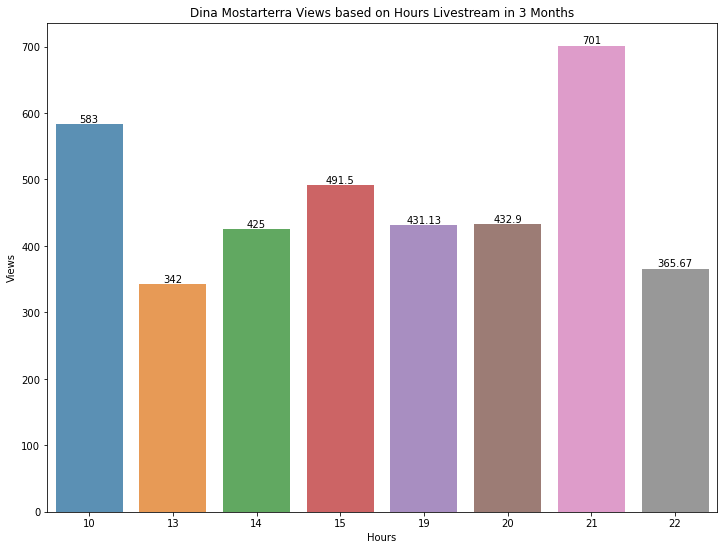

In [106]:
plot_avg_views_hours(data=data, var_name=avg_views_hours, username=USERNAME)

### Convert Timestamp duration to Minutes

In [107]:
convert_timestamp_to_minutes(data=data)

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
0,1,Get to know me better?,502,2022-09-29,UNKNOWN,Dono Reading,Free Talk,01:54:40,19:00:00,20:54,Kamis,19,114.67
1,2,WAJIB PAKE NASII!!!,488,2022-09-30,Cooking Simulator,UNKNOWN,Game,02:00:12,19:00:00,21:00,Jum'at,19,120.20
2,3,Game ini ramah sekali bintang 5,418,2022-10-02,Getting Over It,UNKNOWN,Game,01:52:50,19:45:00,21:37,Minggu,19,112.83
3,4,I will put you into turu,318,2022-10-04,UNKNOWN,UNKNOWN,Free Talk,01:58:53,22:00:00,23:58,Selasa,22,118.88
4,5,Please spare me...,267,2022-10-06,Outlast,UNKNOWN,Game,01:40:02,22:00:00,23:40,Kamis,22,100.03
5,6,Akhirnya Ketemu Om Dante!!,300,2022-10-07,Devil My Cry 5,UNKNOWN,Game,01:50:54,19:30:00,21:20,Jum'at,19,110.90
6,7,I am bad at Teaching but... here we are,342,2022-10-16,UNKNOWN,UNKNOWN,Free Talk,01:59:10,13:00:00,14:59,Minggu,13,119.17
7,8,Melanjutkan Petualangan Abang Reporter...,460,2022-10-17,Outlast,UNKNOWN,Game,02:34:20,20:00:00,22:34,Senin,20,154.33
8,9,"P palo, please bear with my aim",474,2022-10-18,Valorant,UNKNOWN,Game,02:57:34,19:30:00,22:27,Selasa,19,177.57
9,10,Memecahkan misteri dunia bersama Pergil,305,2022-10-20,Devil My Cry 5,UNKNOWN,Game,02:10:24,19:30:00,21:40,Kamis,19,130.40


### Average per minutes

In [108]:
mean_duration = np.average(data['convert_duration_minutes'])
mean_duration

138.48228571428575

### Distribution Plot Stream Duration 

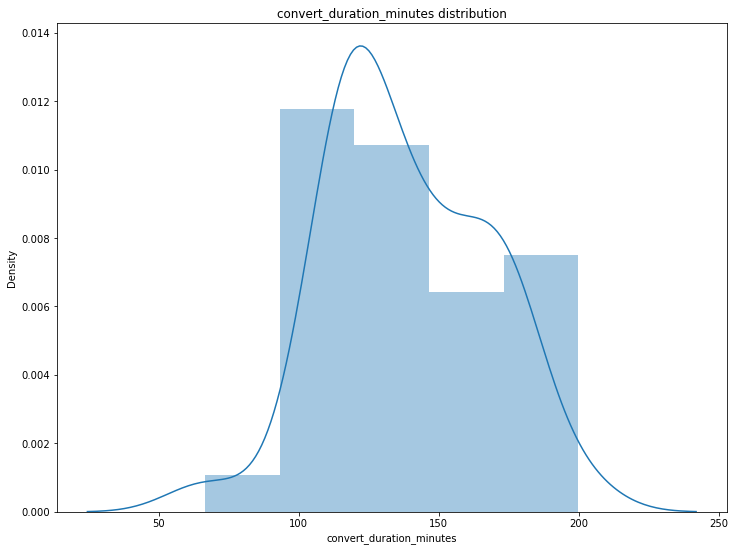

In [109]:
plot_distribution(data=data, col="convert_duration_minutes")

### Get average Stream Duration by Days 

In [110]:
avg_stream_duration_days = round(data.groupby('days')['convert_duration_minutes'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]), 2)

In [111]:
avg_stream_duration_days

days
Senin     148.42
Selasa    148.22
Rabu      152.61
Kamis     136.25
Jum'at    131.28
Sabtu     122.31
Minggu    129.76
Name: convert_duration_minutes, dtype: float64

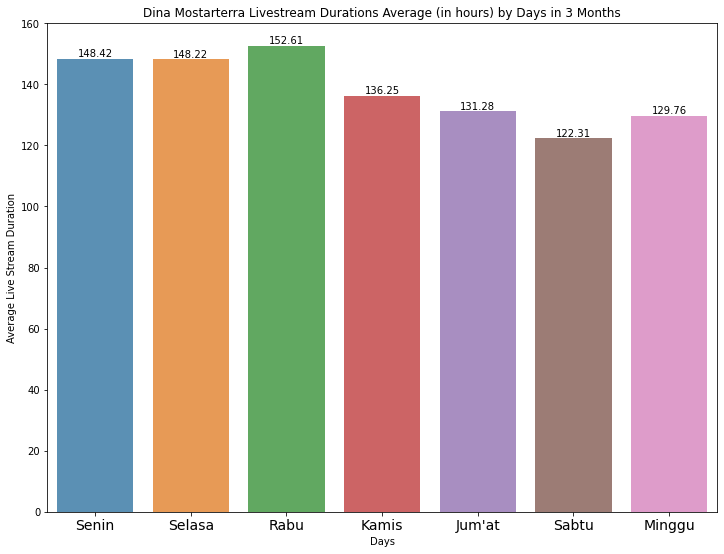

In [135]:
plot_avg_duration_stream_days(data=data, var_name=avg_stream_duration_days, username=USERNAME)

In [113]:
data[data["days"] == "Senin"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
7,8,Melanjutkan Petualangan Abang Reporter...,460,2022-10-17,Outlast,UNKNOWN,Game,02:34:20,20:00:00,22:34,Senin,20,154.33
12,13,Membangun Livipro Dorm bersama kalian,646,2022-10-31,The Sims 4,UNKNOWN,Game,02:28:36,19:30:00,21:58,Senin,19,148.60
19,20,I promise I will get scared... 🥶🥶,360,2022-11-21,The Convenience Store,UNKNOWN,Game,01:57:16,20:30:00,22:27,Senin,20,117.27
24,25,Memasak untuk Livium Chapter: 01 😋,381,2022-12-05,Cooking Simulator,UNKNOWN,Game,02:21:42,19:00:00,21:21,Senin,19,141.70
28,29,"Chill, Chat and Cattos with Me",487,2022-12-12,Cats Organized Neatly,UNKNOWN,Game,02:43:16,20:00:00,22:43,Senin,20,163.27
33,34,"Livium Chapter:01 Alter, Finally!?",482,2022-12-26,The Sims 4,UNKNOWN,Game,02:45:21,19:30:00,22:15,Senin,19,165.35


In [114]:
data[data["days"] == "Rabu"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
10,11,"Rekomen game favorit kalian, yuk!",612,2022-10-26,UNKNOWN,Game Review,Free Talk,02:56:05,20:00:00,22:56,Rabu,20,176.08
15,16,"Let's Play and Chill, I missed you guys!",411,2022-11-16,Coffee Talk,UNKNOWN,Game,02:28:28,20:00:00,22:28,Rabu,20,148.47
22,23,Welcome to the Wonderland!,290,2022-11-30,Alice: Madness Returns,UNKNOWN,Game,02:03:48,20:00:00,22:03,Rabu,20,123.80
25,26,"Kopi, Kopi apa yang bikin kangen?",433,2022-12-07,UNKNOWN,NoNgDin,Free Talk,01:54:49,15:00:00,16:54,Rabu,15,114.82
29,30,Thank you For The Supports and Love!,558,2022-12-14,UNKNOWN,2k Subs Celebration,Game,03:19:54,19:00:00,22:19,Rabu,19,199.90


In [115]:
data[data["convert_duration_minutes"] == max(data["convert_duration_minutes"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
29,30,Thank you For The Supports and Love!,558,2022-12-14,UNKNOWN,2k Subs Celebration,Game,03:19:54,19:00:00,22:19,Rabu,19,199.9


In [116]:
data[data["convert_duration_minutes"] == min(data["convert_duration_minutes"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
30,31,Sleep Call for the First Time?,512,2022-12-17,UNKNOWN,UNKNOWN,Free Talk,01:06:30,22:00:00,23:06,Sabtu,22,66.5


### Check Correlation

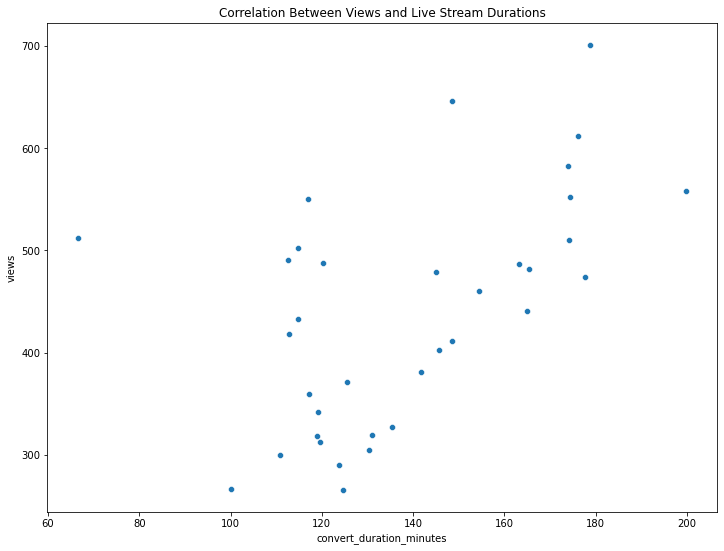

In [117]:
plot_correlation(data=data)

- Berdasarkan hasil scatter plot dapat dilihat, cukup menarik wkwk

### Dina Livestream Topics 

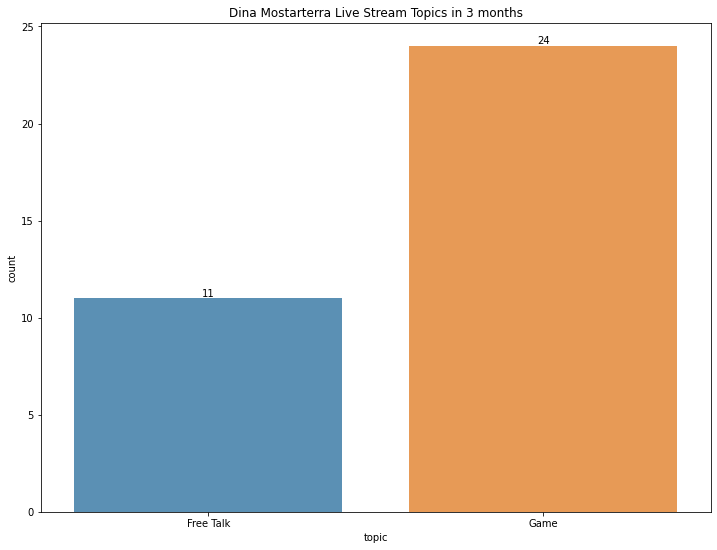

In [118]:
plot_livestream_topic(data=data, col_name="topic", username=USERNAME)

### Free Talk Topic 

In [119]:
free_talk = data[data["topic"] == "Free Talk"]

In [120]:
free_talk.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
0,1,Get to know me better?,502,2022-09-29,UNKNOWN,Dono Reading,Free Talk,01:54:40,19:00:00,20:54,Kamis,19,114.67
3,4,I will put you into turu,318,2022-10-04,UNKNOWN,UNKNOWN,Free Talk,01:58:53,22:00:00,23:58,Selasa,22,118.88
6,7,I am bad at Teaching but... here we are,342,2022-10-16,UNKNOWN,UNKNOWN,Free Talk,01:59:10,13:00:00,14:59,Minggu,13,119.17
10,11,"Rekomen game favorit kalian, yuk!",612,2022-10-26,UNKNOWN,Game Review,Free Talk,02:56:05,20:00:00,22:56,Rabu,20,176.08
16,17,Nyobain Media Share skuy!~,403,2022-11-17,UNKNOWN,Dono Reading,Free Talk,02:25:34,20:00:00,22:25,Kamis,20,145.57


In [121]:
free_talk[free_talk["views"] == max(free_talk["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
10,11,"Rekomen game favorit kalian, yuk!",612,2022-10-26,UNKNOWN,Game Review,Free Talk,02:56:05,20:00:00,22:56,Rabu,20,176.08


In [122]:
free_talk[free_talk["views"] == min(free_talk["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
3,4,I will put you into turu,318,2022-10-04,UNKNOWN,UNKNOWN,Free Talk,01:58:53,22:00:00,23:58,Selasa,22,118.88


In [123]:
avg_stream_free_talk = round(free_talk.groupby('days')['convert_duration_minutes'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]) / 60, 2)

In [124]:
avg_stream_free_talk

days
Senin      NaN
Selasa    1.98
Rabu      2.42
Kamis     2.41
Jum'at     NaN
Sabtu     1.93
Minggu    1.97
Name: convert_duration_minutes, dtype: float64

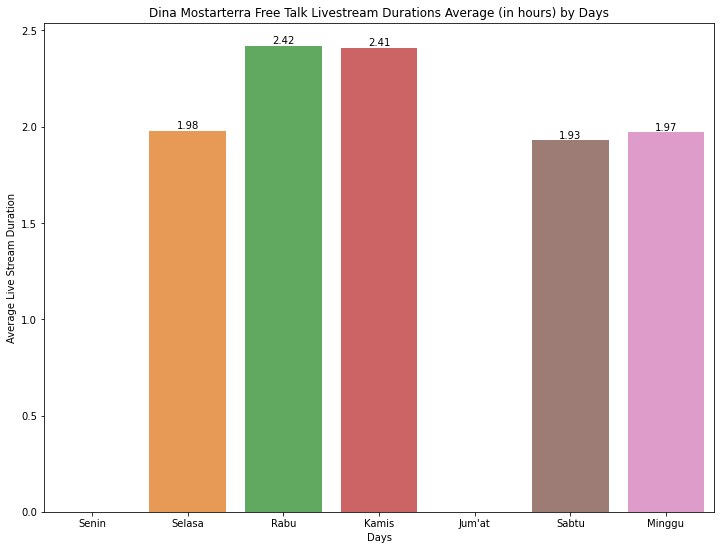

In [125]:
plt.figure(figsize=(12,9))
ax = sns.barplot(avg_stream_free_talk.index, avg_stream_free_talk.values, alpha=0.8)
ax.bar_label(ax.containers[0])
plt.xlabel("Days")
plt.ylabel("Average Live Stream Duration")
plt.title(f"{USERNAME} Free Talk Livestream Durations Average (in hours) by Days")
plt.show()

### Game Topic 

In [126]:
data_game = data[data['topic'] == 'Game']

In [127]:
data_game.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
1,2,WAJIB PAKE NASII!!!,488,2022-09-30,Cooking Simulator,UNKNOWN,Game,02:00:12,19:00:00,21:00,Jum'at,19,120.20
2,3,Game ini ramah sekali bintang 5,418,2022-10-02,Getting Over It,UNKNOWN,Game,01:52:50,19:45:00,21:37,Minggu,19,112.83
4,5,Please spare me...,267,2022-10-06,Outlast,UNKNOWN,Game,01:40:02,22:00:00,23:40,Kamis,22,100.03
5,6,Akhirnya Ketemu Om Dante!!,300,2022-10-07,Devil My Cry 5,UNKNOWN,Game,01:50:54,19:30:00,21:20,Jum'at,19,110.90
7,8,Melanjutkan Petualangan Abang Reporter...,460,2022-10-17,Outlast,UNKNOWN,Game,02:34:20,20:00:00,22:34,Senin,20,154.33


### Game List 

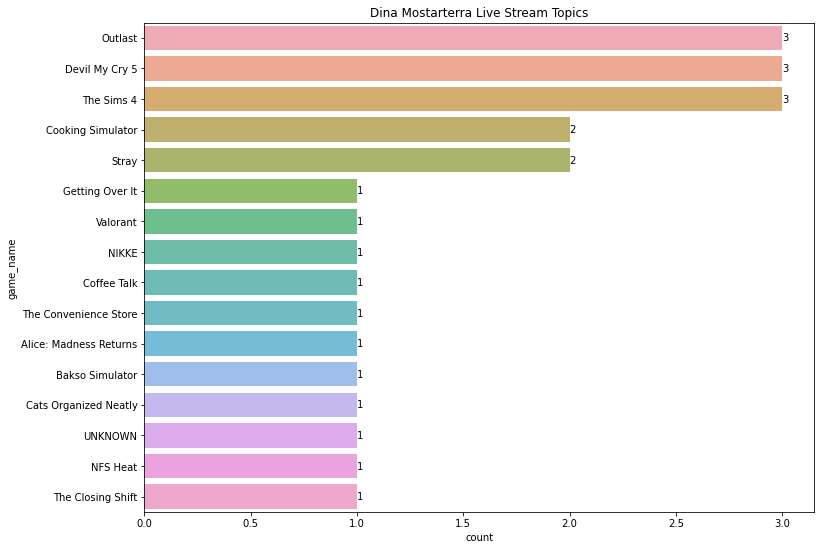

In [128]:
plt.figure(figsize=(12,9))
plt.title(f'{USERNAME} Live Stream Topics')
ax = sns.countplot(y=data_game['game_name'], alpha=0.8, order = data_game['game_name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [129]:
data_game[data_game["views"] == max(data_game["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
31,32,Ujian Sim A di Livium Universe,701,2022-12-22,NFS Heat,UNKNOWN,Game,02:58:46,21:00:00,23:58,Kamis,21,178.77


In [130]:
data_game[data_game["views"] == min(data_game["views"])]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
21,22,OMW Jadi Babu si Oyen!,266,2022-11-27,Stray,UNKNOWN,Game,02:04:36,19:30:00,21:34,Minggu,19,124.6


### Content Name

In [131]:
data_content = data[data["content_name"] != "UNKNOWN"]

In [132]:
data_content["content_name"].unique()

array(['Dono Reading', 'Game Review', 'Cat Contest', 'NoNgDin',
       '2k Subs Celebration'], dtype=object)

In [133]:
data_content.head()

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
0,1,Get to know me better?,502,2022-09-29,UNKNOWN,Dono Reading,Free Talk,01:54:40,19:00:00,20:54,Kamis,19,114.67
10,11,"Rekomen game favorit kalian, yuk!",612,2022-10-26,UNKNOWN,Game Review,Free Talk,02:56:05,20:00:00,22:56,Rabu,20,176.08
16,17,Nyobain Media Share skuy!~,403,2022-11-17,UNKNOWN,Dono Reading,Free Talk,02:25:34,20:00:00,22:25,Kamis,20,145.57
17,18,Feed me with more cat pics!,441,2022-11-19,UNKNOWN,Cat Contest,Free Talk,02:45:03,20:00:00,22:45,Sabtu,20,165.05
20,21,NoNgDin - Nongkrong Bareng Dina,479,2022-11-24,UNKNOWN,NoNgDin,Free Talk,02:24:57,14:00:00,16:24,Kamis,14,144.95


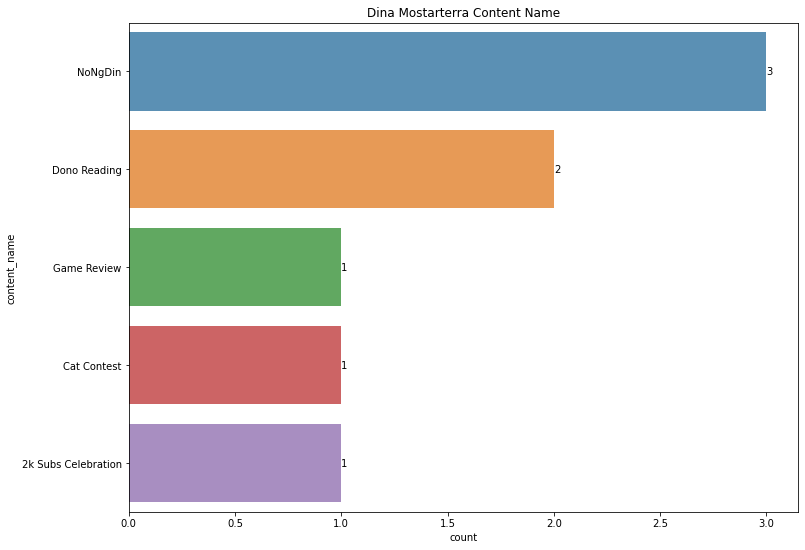

In [134]:
plt.figure(figsize=(12,9))
plt.title(f'{USERNAME} Content Name')
ax = sns.countplot(y=data_content['content_name'], alpha=0.8, order = data_content['content_name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [136]:
data[data["content_name"] == "NoNgDin"]

,id,title,views,date,game_name,content_name,topic,duration,start_stream,end_stream,days,hours,convert_duration_minutes
20,21,NoNgDin - Nongkrong Bareng Dina,479,2022-11-24,UNKNOWN,NoNgDin,Free Talk,02:24:57,14:00:00,16:24,Kamis,14,144.95
23,24,Berita apakah yang kita bahas hari ini?,550,2022-12-04,UNKNOWN,NoNgDin,Free Talk,01:56:58,15:00:00,16:56,Minggu,15,116.97
25,26,"Kopi, Kopi apa yang bikin kangen?",433,2022-12-07,UNKNOWN,NoNgDin,Free Talk,01:54:49,15:00:00,16:54,Rabu,15,114.82
